# Bad Betas

Tasks: 

- try changing `method="RK45"` using `solve_ivp`

- system might be stiff and Runge Kutta might fail


Notes:


> Explicit Runge-Kutta methods (‘RK23’, ‘RK45’, ‘DOP853’) should be used for non-stiff problems and implicit methods (‘Radau’, ‘BDF’) for stiff problems

i.e. for unstable problems unless the step size is taken to be extremely small:

- Implicit Runge-Kutta method might be good

- BDF (Backward Differentiation Formula) implicit multi-step method should be good

- LSODA uses adaptive Adams methods for non-stiff parts and BDF methods for stiff parts, automatically switching between them


In [5]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import solve_ivp
import pickle
from scipy.integrate import odeint

import sys
sys.path.append('../tests/')
from test_solving_KEs_complete import *

In [6]:
methods = [
    "RK45",
    "BDF",
    "Radau",
    "LSODA"
]

In [7]:
bad_indices = [
    (7, 8),
    (7, 9),
    (8, 6),
    (8, 7),
    (8, 8),
    (8, 9),
    (9, 4),
    (9, 5),
    (9, 6),
    (9, 7),
    (9, 8),
    (9, 9)]

In [ ]:
"""Complete case test."""
# setup
# TODO: increase these values
N = 100
I0 = 10 
time_max = 100

beta1 = 2 / N       # pairwise infection rate
beta2 = 4 / (N**2)  # hyperedge contagion rate
mu    = 1           # recovery rate

print(f"Setup: \n")
print(f"\tH = Complete Hypergraph, N = {N}, I0 = {I0}\n")
print(f"\tbeta1 = {beta1}, beta2 = {beta2}, mu = {mu}\n")

Setup: 

	H = Complete Hypergraph, N = 100, I0 = 10

	beta1 = 0.02, beta2 = 0.0004, mu = 1



In [9]:
i_max = 10
j_max = 10

k_star = np.zeros((i_max, j_max)) # to store the values k^* = E[X(t_max)]

eps = 1e-1 # shift for esp to not start with 0 !

beta1_vec = (np.array(list(range(i_max))) + eps) / N
beta2_vec = (np.array(list(range(j_max))) + eps) / (N**2)

print(f"beta2: {beta1_vec[:5]}, ..., {beta1_vec[-3:-1]}")
print(f"beta2: {beta2_vec[:5]}, ..., {beta1_vec[-3:-1]}")

beta2: [0.001 0.011 0.021 0.031 0.041], ..., [0.071 0.081]
beta2: [1.0e-05 1.1e-04 2.1e-04 3.1e-04 4.1e-04], ..., [0.071 0.081]


In [10]:
M = N + 1 # number of all states

# set the initial condition
p0 = np.zeros(M)
p0[I0] = 1.0 # all other states have prob 0 at time 0
print(f"p0 = {p0[:20]} ...")

p0 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] ...


In [11]:
# time range and times to evaluate solution
nsteps = 201
t_span = (0.0, time_max)
t_eval = np.linspace(t_span[0], t_span[1], nsteps)
t_eval

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [12]:
# for method in methods:
# sol = solve_ivp(f_ode, 
#                 t_span, 
#                 p0, 
#                 t_eval=t_eval,
#                 method=method
# )

In [13]:
# testing each method on single bad beta1, beta2 pair
bad_i, bad_j = bad_indices[0]
beta1 = beta1_vec[bad_i]
beta2 = beta2_vec[bad_j]

# prepare ode system first
ode_system_complete = list_all_ODEs_complete(N, beta1, beta2, mu)

def f_ode(t, p):
    return ode_system_complete(t, p)
sol = odeint(ode_system_complete, p0, t_eval)

/var/folders/_8/lk5mcvyj2cz0rzsbxlg5954c0000gn/T/ipykernel_4403/2102752092.py:11: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(ode_system_complete, p0, t_eval)


In [14]:
sol.shape

(201, 101)

In [15]:
sol[:,0]

array([ 0.00000000e+000,  4.08668589e-009,  4.45196962e+252,
        2.55170650e+151,  1.21272093e-267,  1.29509168e+161,
        1.78909005e+161,  6.42261462e+045,  8.73990549e+245,
        1.81596891e-152,  7.34483871e+223,  2.64521037e+185,
        1.28264699e-312,  1.33360319e+241,  1.27991129e-152,
        1.03935518e-028,  3.32524709e-188,  8.28139228e-310,
        1.24002374e+180,  1.33360320e+241,  5.08863857e-299,
        6.38166389e+247,  1.05957293e+214,  2.46090815e-154,
        7.01413727e-009,  4.98326333e+151, -3.42206551e-294,
        2.39091485e-212, -3.14848348e-294,  1.13628931e-153,
        1.48511578e+161,  6.38796479e+029,  1.08792036e-202,
        5.70727135e+188,  1.04146951e-152,  1.39691838e-258,
        5.70144980e+188,  3.45211702e+175,  1.67792004e+243,
        1.99270017e+209,  1.28264699e-312,  1.12296098e+219,
        1.06112095e-153,  5.46781623e+241,  4.26129965e+257,
        1.27661731e-152,  7.25416377e-043,  8.78307194e-268,
        9.92588757e-177,

In [16]:
expected_values = np.zeros(t_eval.shape[0], dtype=float)
# expected_values

In [17]:
for i in range(t_eval.shape[0]):
    expected_values[i] = np.sum([k * sol[i, k] for k in range(M)])
# expected_values

In [18]:
# expected_values = calculate_expected_values(sol, t_eval)

/var/folders/_8/lk5mcvyj2cz0rzsbxlg5954c0000gn/T/ipykernel_4403/1942055377.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


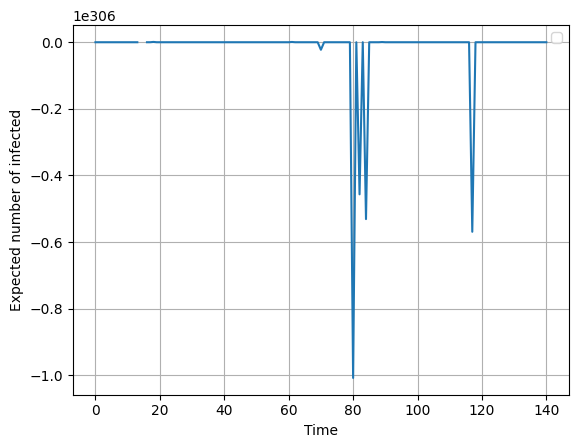

In [19]:
plt.figure()
plt.plot(t_eval, expected_values)
plt.xlabel("Time")
plt.ylabel("Expected number of infected")
plt.grid(True)
plt.legend()
plt.savefig("../figures/solutions-kolmogorov/complete/bad-beta-pair-methods-2.pdf", 
            format='pdf', bbox_inches='tight')
plt.show()